# Automobile Dataset

we'll examine how the characteristics of the car relate to the `normalized_losses` column, which will be our outcome. This column represents the average payment that an insurance company pays when a car of that particular row has an accident. We want to predict this payment for other cars, so we'll use linear regression for this task.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

auto = pd.read_csv("automobiles.csv")
X = auto.drop(["normalized_losses"], axis = 1)
y = auto["normalized_losses"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 726)

## Coefficient / Predictors


# Linear Regression with SKLearn

within this module is a class called LinearRegression, which we'll use for our linear regressions. In order to use the LinearRegression class, we need to import it, just like we've done with pandas and numpy. We can do this as follows:

``
from sklearn.linear_model import LinearRegression
`` 

We can do this by calling the class and assigning it to a variable, as follows:

``
lm = LinearRegression()
`` 

This new object hasn't been fit to any data yet, so there's not much we can do with it. As we've learned previously, fitting a model involves using data to learn the specific parameters for the model. In the case of "fitting" a linear regression, we mean to say we are learning or estimating the coefficients.

## Fitting a LinearRegression Object

We have our model variable, which holds our linear regression model. In order to calculate the coefficients, the model needs the data. The LinearRegression class has a method for calculating the regression coefficients called fit(). The fit() method takes two arguments:

* The predictors that we want to use in the model

* outcome

```

lm = LinearRegression()

lm.fit(X, y)  # the coefficients are calculated here
```

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

auto = pd.read_csv("automobiles.csv")
X = auto.drop(["normalized_losses"], axis = 1)
y = auto["normalized_losses"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 727)

X = X_train[['length','engine_size']]

model = LinearRegression()
model.fit(X,y_train)

LinearRegression()

## Interpreting The Intercept

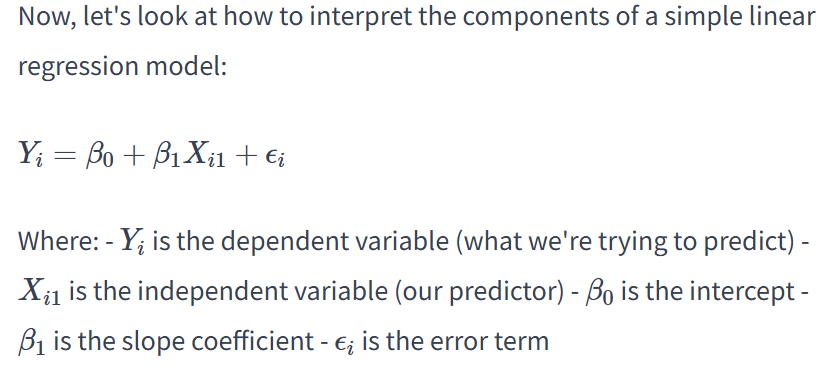

## Interpreting The Slope
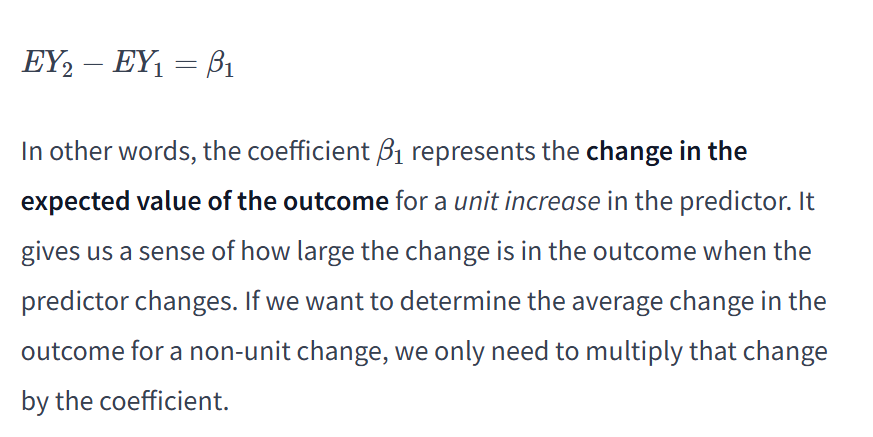


## Interpreting Coefficients from Multiple Linear Regression
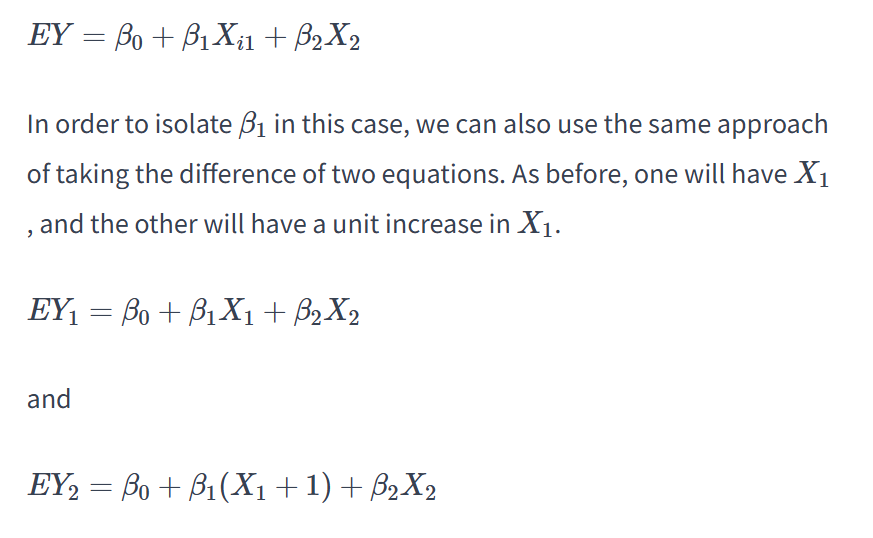

## Interpreting Coefficients of Categorical Predictors

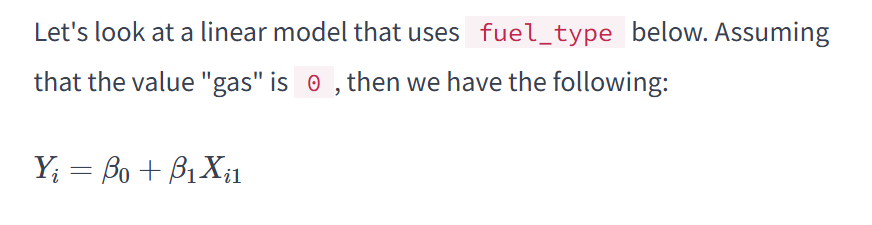

Where X1 will be 1 if fuel_type is "diesel." Using this model, let's consider how to interpret each of the coefficients here.

We know that β0 is the expected value of the outcome when all of the predictors for the dummy variables are 0. What this means for any model using a categorical variable is that the interpretation for the intercept always involves the reference group. 

**So, for the model above, the intercept is the average outcome for "gas" cars**

Thus, β1 represents the change in the average outcome if the car were diesel instead of fuel.

## Evaluating Linear Regression
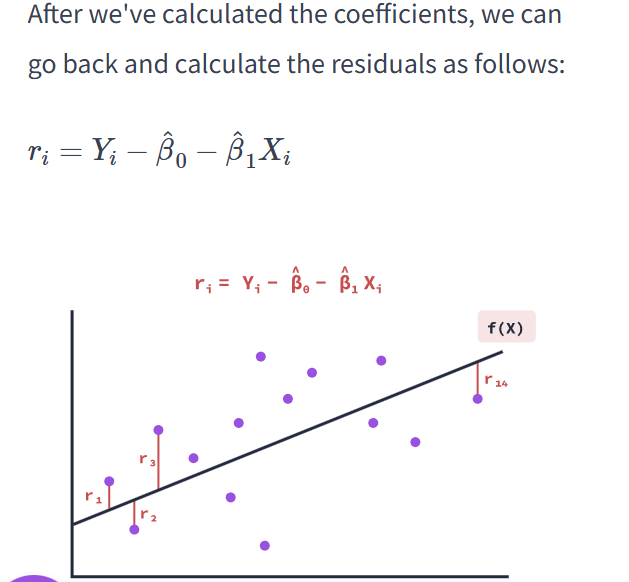

The residuals `ri`, therefore, are what are left over after we subtract the model's prediction from the observed outcome. 

In order to evaluate a linear regression model, we need to examine the **residuals**, which are supposed to approximate the true error ϵ for each observation.

In order to calculate the residuals, we need to produce the model predictions first. We could calculate these by hand by using the calculated coefficients from the model, but we can actually get the predictions directly using the `predict()` method.
**Given a set of predictors, the predict() method will return the predicted values of the model.**

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

auto = pd.read_csv("automobiles.csv")
X = auto.drop(["normalized_losses"], axis = 1)
y = auto["normalized_losses"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 728)

#create 2 predictors subset
X_train_subset=X_train[['length','width']]

model = LinearRegression()
model.fit(X_train_subset,y_train)
predictions = model.predict(X_train_subset)

#array of residuals
residuals = y_train - predictions

### Checking Residual Mean

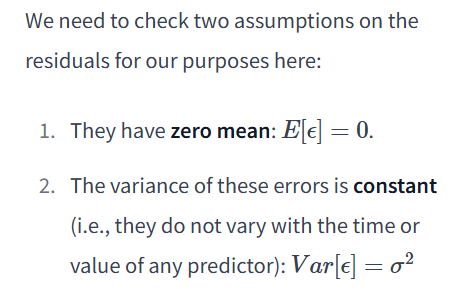

A non-zero error suggests that the model systematically under- or over-estimates the outcome. 

If we were to find that the errors have some kind of trend, it might merit rethinking using the linear model.

In [3]:
print(residuals.mean())

-4.699652740460505e-14


### Checkign Constante Variance

Plot scatter - predictions vs residuals

The idea behind the residual plot is that we can look at how spread out the residuals are over the predicted values. If the constant variance assumption holds, then we should see a band of constant width

### Score

We've only discussed the sum of squared errors in the context of calculating coefficients. We can also use a similar score as a rough measure of how accurate the model is. Instead of taking the sum, we can use the **mean squared error (MSE)** of the data. 

As the name suggests, the MSE represents the average squared error of the model. The higher this is, the less accurate we would consider the mode

scikit-learn gives us a function in the metrics module to easily calculate the MSE, called `mean_squared_error()`. This function takes the actual observations in the data and the predicted model values.

`from sklearn.metrics import mean_squared_error`

`from sklearn.metrics import root_mean_squared_error`

`mean_squared_error(y_true, y_pred)`




In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

training_mse = mean_squared_error(y_train,predictions)

training_rmse = root_mean_squared_error(y_train,predictions)
training_mse
training_rmse

33.490121550930326

### The Coefficient of Determination (R²)

Whereas the MSE looks at the squared errors as a way to judge the model, the R² examines how well the model accounts for the variance in the outcome.

However, no models are perfect, so there is almost always a degree of error. These errors also have a variance, which is described by the sum of squared errors! 

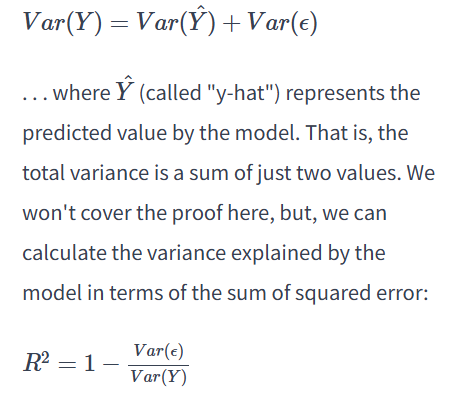

To calculate R², we need to use the `r2_score()` function from the metrics module in scikit-learn. Its arguments are similar to those of `mean_squared_error`

In [17]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train,predictions)
r2

0.016067721423534076

# Evaluating Test Dataset

The test dataset is data that the model hasn't seen yet, so we would expect performance to be worse here. **Our hope is that the test error isn't too far from the training error** What we mean by "error" can depend on the model, data and cost function we are using. In the case of linear regression, the error will be the mean squared error (MSE).

## Test Error
We don't use the training error to judge the predictive ability of a model because it's too optimistic.

When we compare candidate models to use, we'll ultimately judge them based on their test error. The smaller the error, the better.

Computing the test error is the same process as computing the training error, except we use the test dataset instead. Since the test error is also an MSE, we can also take its square root to derive the **root mean squared error (RMSE)**, which is on the same scale as the outcome.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

auto = pd.read_csv("automobiles.csv")
X = auto.drop(["normalized_losses"], axis = 1)
y = auto["normalized_losses"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 729)

#create 2 predictors subset
X_train_subset=X_train[['length','engine_size']]

X_test_subset=X_test[['length','engine_size']]

#LM object
model = LinearRegression()

#Training predictions
model.fit(X_train_subset,y_train)
train_pred = model.predict(X_train_subset)

#Test predictions
test_pred = model.predict(X_test_subset)

#MSE
train_mse = mean_squared_error(y_train,train_pred)
test_mse = mean_squared_error(y_test,test_pred)

print(train_mse)
print(test_mse)

1167.836538314898
1226.0145660561025


## Feature Selection And Correlation

The process of creating a predictive model should be viewed as an **iterative one**. Once we've calculated the test Mean Squared Error (MSE), we have an idea of how the model might perform on unseen data. If the test error seems reasonable, we might proceed to use the model on future datasets. If not, we should consider iterating on our linear model to try to reduce the test MSE further.

There are several ways we can improve our model. We might consider a different class of models entirely, or we might focus on **selecting different predictors.**

One key idea behind feature selection is that we can improve a model's predictive ability by choosing predictors that are **highly correlated with the target variable** (also known as the dependent variable, label, or outcome). High correlation between a predictor and the target implies that changes in the predictor are associated with predictable changes in the target. If a predictor wasn't correlated with the target, then changes in the predictor would provide little predictive value.

When categorical variables are used in linear regression models, they represent changes in the average target value when the observation belongs to a non-reference category. 

In [20]:
auto_corr = auto.corr(numeric_only=True)
auto_corr

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,-0.162794
normalized_losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel_base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.760952
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.843371
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,0.244836
curb_weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.893639
engine_size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.841496
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,0.533890
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,0.160664


## More complex Predictors

While we're limited by linear structure, we can try to make the predictors themselves more complex. For example, we might want to use quadratic or other polynomial forms of predictors:

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \epsilon$

Polynomial predictors might be useful if the initial visualization indicates a non-linear relationship. Polynomial predictors might also be indicated if the residual plot from an initial model indicates that the residuals themselves have a polynomial trend to them.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

auto = pd.read_csv("automobiles.csv")
X = auto.drop(["normalized_losses"], axis = 1)
y = auto["normalized_losses"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 729)

#adding predictors for polynomial 2 orders
X_train['length_squared'] = X_train['length'] ** 2

X_test['length_squared'] = X_test['length'] ** 2

#create 2 predictors subset
X_train_subset=X_train[['length','length_squared']]

X_test_subset=X_test[['length','length_squared']]

#LM object
model = LinearRegression()

#Training predictions
model.fit(X_train_subset,y_train)

train_predictions = model.predict(X_train_subset)

#Test predictions
test_predictions = model.predict(X_test_subset)

#MSE
train_mse = mean_squared_error(y_train,train_predictions)
test_mse = mean_squared_error(y_test,test_predictions)

## Outcome Transformations


Transforming the outcome serves a different purpose than transforming a predictor.

In some cases, the outcome itself might have several extreme values at either the low or high end. These extreme values can influence the estimated coefficients and cause the residuals to deviate from constant variance.

In these cases, it might be useful to transform the outcome so that extreme values are less pronounced. One of the most common ways to do this is the log-transformation. Using this transformation means we're trying to predict the log of the outcome instead of the outcome itself:

$log \; Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2$

The log transformation is useful when the outcome spans several magnitudes (i.e., from tens to ten-thousands) or has extreme values. By reducing the "extremeness" of outcomes, we are trying to ensure the model has constant variance in the residuals. 


### log transformation

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

auto = pd.read_csv("automobiles.csv")
X = auto.drop(["normalized_losses"], axis = 1)
y = auto["normalized_losses"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 729)

X_train["length_squared"] = X_train["length"] ** 2
X_test["length_squared"] = X_test["length"] ** 2

X_train_subset=X_train[['length']]
X_test_subset=X_test[['length']]

y_train_log = np.log2(y_train)
y_test_log = np.log2(y_test)

#LM object
model = LinearRegression()

#Training predictions
model.fit(X_train_subset,y_train_log)

train_predictions = model.predict(X_train_subset)

#Test predictions
test_predictions = model.predict(X_test_subset)

#MSE
train_mse = mean_squared_error(y_train_log,train_predictions)
test_mse = mean_squared_error(y_test_log,test_predictions)



### The Box-Cox Transformation
Another transformation worth knowing is the **Box-Cox transformation.** The idea behind this transformation is to try to have the outcome have a similar distribution to a Gaussian, or bell, shape. This bell shape also makes it more likely that the residuals will have constant variance. This transformation is located in the scipy library, as shown below:

``from scipy.stats import boxcox
boxcox(y)``

$y(\lambda)=\left\{\begin{array}{ll}
\frac{y^{\lambda}-1}{\lambda}, & \text { if } \lambda \neq 0 \\
\log y, & \text { if } \lambda=0
\end{array}\right.$


where 
 is a value that we can change. In the boxcox() implementation in scipy, 
 is calculated automatically such that the input will be as close to bell-shaped as possible.

Note that the Box-Cox transformation reduces to the logarithm transform for 
. The Box-Cox transformation is limited by the fact that the **values used in the transformation must be positive,** so keep this in mind if you think about using it.

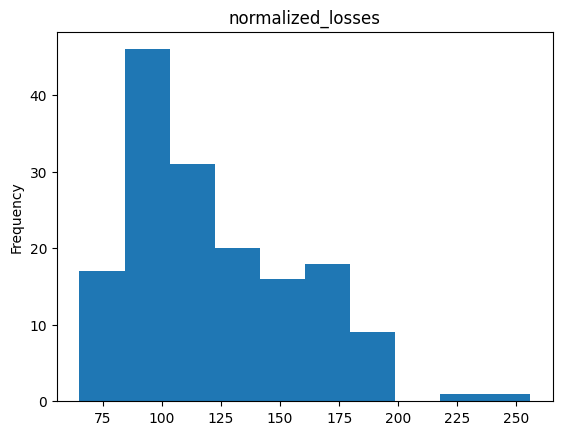

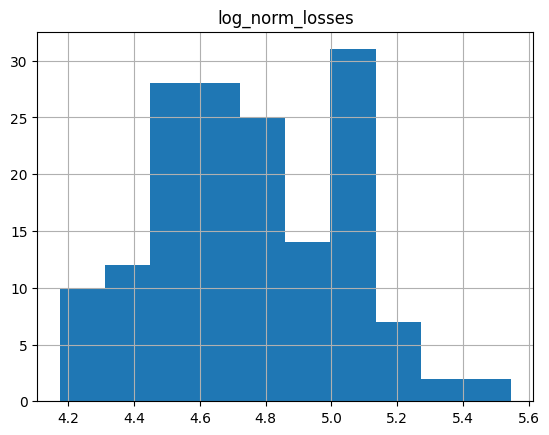

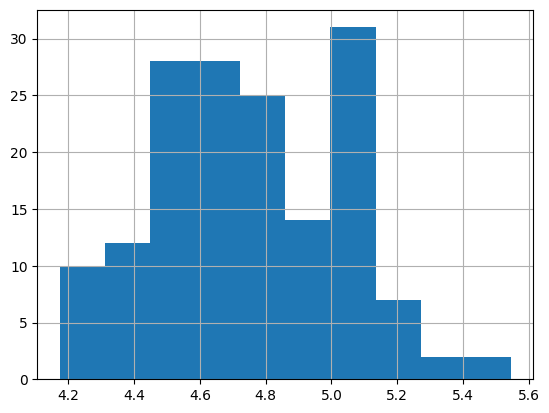

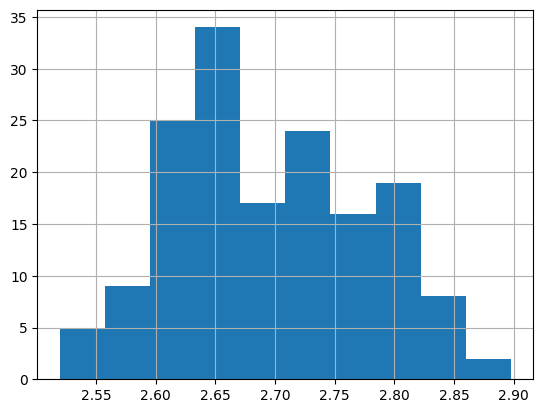

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
import matplotlib.pyplot as plt


auto = pd.read_csv("automobiles.csv")
X = auto.drop(["normalized_losses"], axis = 1)
y = auto["normalized_losses"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 729)

#normalized_losses histogram
y.plot.hist(title='normalized_losses')
plt.show()

#create new column with log_norm_losses

#lambda = 0 means log(y)
auto["log_norm_losses"] = boxcox(auto["normalized_losses"], lmbda = 0)
auto.hist("log_norm_losses")
plt.show()

auto['log_norm_losses'].hist()
plt.show()

auto['boxcox_norm_losses']=boxcox(y)[0]
auto['boxcox_norm_losses'].hist()
plt.show()
